# **Final Project Task 1 - Census Data Preprocess**

Requirements

- Target variable specification:
    - The target variable for this project is hours-per-week. 
    - Ensure all preprocessing steps are designed to support regression analysis on this target variable.
- Encode data
- Handle missing values if any
- Correct errors, inconsistencies, remove duplicates if any
- Outlier detection and treatment if any
- Normalization / Standardization if necesarry
- Feature engineering
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [3]:
# 1. Handling missing values
print("Valori lipsă înainte de tratare:")
print(data.isnull().sum())

Valori lipsă înainte de tratare:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [4]:
print(data.sample(n=20))

       age     workclass  fnlwgt     education  education-num  \
20241   65     State-gov  215908       HS-grad              9   
1440    50  Self-emp-inc  175339       HS-grad              9   
8027    45       Private   59380     Bachelors             13   
1739    57     Local-gov   52267       HS-grad              9   
1535    30       Private  197058    Assoc-acdm             12   
22603   20     Local-gov  194630  Some-college             10   
19198   40       Private  145160     Doctorate             16   
28523   46     Local-gov  209057       Masters             14   
19317   45       Private  513660     Bachelors             13   
28564   65       Private   90907       5th-6th              3   
18968   27       Private  154210          11th              7   
8757    22             ?  335453  Some-college             10   
2576    32  Self-emp-inc  110331       HS-grad              9   
15117   49       Private  149049  Some-college             10   
22142   32   Federal-gov 

In [5]:
# Replace '?' with NA
data.replace('?', pd.NA, inplace=True)
print(data.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [6]:
# Count the occurrences of each unique value in the 'workclass' column.
data['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [7]:
# Count the occurrences of each unique value in the 'occupation' column.
data['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [8]:
# Count the number of rows where both the 'workclass' and 'occupation' columns have NaN values.
len(data[data['workclass'].isna() & data['occupation'].isna()])

1836

In [9]:
# Select rows where the 'occupation' column has NaN values, but the 'workclass' column does not have NaN values.
data[data['occupation'].isna() & ~data['workclass'].isna()] 

age     workclass  fnlwgt     education  education-num  \
5361    18  Never-worked  206359          10th              6   
10845   23  Never-worked  188535       7th-8th              4   
14772   17  Never-worked  237272          10th              6   
20337   18  Never-worked  157131          11th              7   
23232   20  Never-worked  462294  Some-college             10   
32304   30  Never-worked  176673       HS-grad              9   
32314   18  Never-worked  153663  Some-college             10   

           marital-status occupation   relationship   race     sex  \
5361        Never-married       <NA>      Own-child  White    Male   
10845            Divorced       <NA>  Not-in-family  White    Male   
14772       Never-married       <NA>      Own-child  White    Male   
20337       Never-married       <NA>      Own-child  White  Female   
23232       Never-married       <NA>      Own-child  Black    Male   
32304  Married-civ-spouse       <NA>           Wife  Black  Female   
32314       Never-married       <NA>      Own-child  White    Male   

       capital-gain  capital-loss  hours-per-week native-country income  
5361              0             0              40  United-States  <=50K  
10845             0             0              35  United-States  <=50K  
14772             0             0              30  United-States  <=50K  
20337             0             0              10  United-States  <=50K  
23232             0             0              40  United-States  <=50K  
32304             0             0              40  United-States  <=50K  
32314             0             0               4  United-States  <=50K

In [10]:
# Assign the value 'No-occupation' to the 'occupation' column for rows where:
# 1. The 'occupation' column has NaN values (data['occupation'].isna()).
# 2. The 'workclass' column has the value 'Never-worked' (data['workclass'] == 'Never-worked').
data.loc[data['occupation'].isna() & (data['workclass'] == 'Never-worked'), 'occupation'] = 'No-occupation'

In [11]:
print(data.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1836
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [22]:
from sklearn.impute import SimpleImputer

# List columns with missing values
columns_with_na = ['workclass', 'occupation', 'native-country']

# Replace pd.NA with np.nan in the columns with missing values
data[columns_with_na] = data[columns_with_na].replace({pd.NA: np.nan})

# Replace missing values with most frecquent value
imputer = SimpleImputer(strategy='most_frequent')
data[columns_with_na] = imputer.fit_transform(data[columns_with_na])

In [23]:
# Check if there are null values left in dataframe
print(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [24]:
# Print the data types of all columns in the DataFrame
print(data.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


##### 02. Encode data

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
# Encode sex and income as binary data (Male - 1, Female  - 0, <=50K  - 0, >50K - 1)
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['income'] = label_encoder.fit_transform(data['income'])

# One-Hot Encoding for the categorial columns 
categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


In [28]:
data.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_No-occupation', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       

In [29]:
data.sample(n=20)

age  fnlwgt     education  education-num  sex  capital-gain  \
5089    53  121441  Some-college             10    1             0   
18691   51   35211       HS-grad              9    1             0   
15597   32  294121    Assoc-acdm             12    0             0   
1786    35  103260       Masters             14    0             0   
19276   26  335998       HS-grad              9    0             0   
20800   62  226733       HS-grad              9    1             0   
7390    50  378747       HS-grad              9    1             0   
10814   44  173704     Bachelors             13    1             0   
15026   23  176724          11th              7    1             0   
10788   47  140045       HS-grad              9    0             0   
11868   49  336509          10th              6    1             0   
8109    20   47791          12th              8    0             0   
984     45  318280       HS-grad              9    1             0   
25336   54   27432       HS-grad              9    1             0   
26507   19   95078       HS-grad              9    0             0   
20515   28  212318       HS-grad              9    1             0   
15218   30  144064       HS-grad              9    1             0   
868     39  176186  Some-college             10    1             0   
2959    48   26145          10th              6    1             0   
5504    40  197923     Bachelors             13    0          2977   

       capital-loss  hours-per-week  income  workclass_Local-gov  ...  \
5089              0              55       0                False  ...   
18691             0              40       0                 True  ...   
15597             0              50       0                False  ...   
1786              0              35       1                 True  ...   
19276             0              38       0                False  ...   
20800             0              40       1                False  ...   
7390              0              40       0                False  ...   
10814             0              40       1                False  ...   
15026             0              40       0                False  ...   
10788             0              40       0                False  ...   
11868             0              40       0                False  ...   
8109              0              10       0                False  ...   
984               0              40       1                 True  ...   
25336             0              40       1                False  ...   
26507             0              15       0                False  ...   
20515             0              55       0                False  ...   
15218             0              62       0                False  ...   
868               0              50       1                False  ...   
2959              0              80       0                False  ...   
5504              0              40       0                False  ...   

       native-country_Portugal  native-country_Puerto-Rico  \
5089                     False                       False   
18691                    False                       False   
15597                    False                       False   
1786                     False                       False   
19276                    False                       False   
20800                    False                       False   
7390                     False                       False   
10814                    False                       False   
15026                    False                        True   
10788                    False                       False   
11868                    False                       False   
8109                     False                       False   
984                      False                       False   
25336                    False                       False   
26507                    False                       False   
20515     

##### 03. Correct errors, inconsistencies, remove duplicates if any. Outlier detection and treatment.

In [30]:
# Identify duplicate rows and count them in one step.
duplicates = data[data.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")

Number of duplicate rows: 24


In [31]:
# Remove duplicate rows and create a new DataFrame
data_no_duplic = data.drop_duplicates()
print(f"Shape after removing duplicates: {data_no_duplic.shape}")

Shape after removing duplicates: (32537, 85)


In [32]:
# Check the distribution for capital-gain si capital-loss
print(data['capital-gain'].value_counts().sort_index())

capital-gain
0        29849
114          6
401          2
594         34
914          8
         ...  
25236       11
27828       34
34095        5
41310        2
99999      159
Name: count, Length: 119, dtype: int64


In [33]:
print(data['capital-loss'].value_counts().sort_index())

capital-loss
0       31042
155         1
213         4
323         3
419         3
        ...  
3004        2
3683        2
3770        2
3900        2
4356        3
Name: count, Length: 92, dtype: int64


In [34]:
# Identify rows where both 'capital-gain' and 'capital-loss' are greater than 0 (inconsistent cases)
inconsistent_rows = data[(data['capital-gain'] > 0) & (data['capital-loss'] > 0)]
print(inconsistent_rows)


Empty DataFrame
Columns: [age, fnlwgt, education, education-num, sex, capital-gain, capital-loss, hours-per-week, income, workclass_Local-gov, workclass_Never-worked, workclass_Private, workclass_Self-emp-inc, workclass_Self-emp-not-inc, workclass_State-gov, workclass_Without-pay, marital-status_Married-AF-spouse, marital-status_Married-civ-spouse, marital-status_Married-spouse-absent, marital-status_Never-married, marital-status_Separated, marital-status_Widowed, occupation_Armed-Forces, occupation_Craft-repair, occupation_Exec-managerial, occupation_Farming-fishing, occupation_Handlers-cleaners, occupation_Machine-op-inspct, occupation_No-occupation, occupation_Other-service, occupation_Priv-house-serv, occupation_Prof-specialty, occupation_Protective-serv, occupation_Sales, occupation_Tech-support, occupation_Transport-moving, relationship_Not-in-family, relationship_Other-relative, relationship_Own-child, relationship_Unmarried, relationship_Wife, race_Asian-Pac-Islander, race_Blac

In [35]:
# Descriptive statistics for data dataset
print(data.describe())

                age        fnlwgt  education-num           sex  capital-gain  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679      0.669205   1077.648844   
std       13.640433  1.055500e+05       2.572720      0.470506   7385.292085   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      1.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      1.000000      0.000000   
max       90.000000  1.484705e+06      16.000000      1.000000  99999.000000   

       capital-loss  hours-per-week        income  
count  32561.000000    32561.000000  32561.000000  
mean      87.303830       40.437456      0.240810  
std      402.960219       12.347429      0.427581  
min        0.000000        1.000000      0.000000  
25%        0.000000

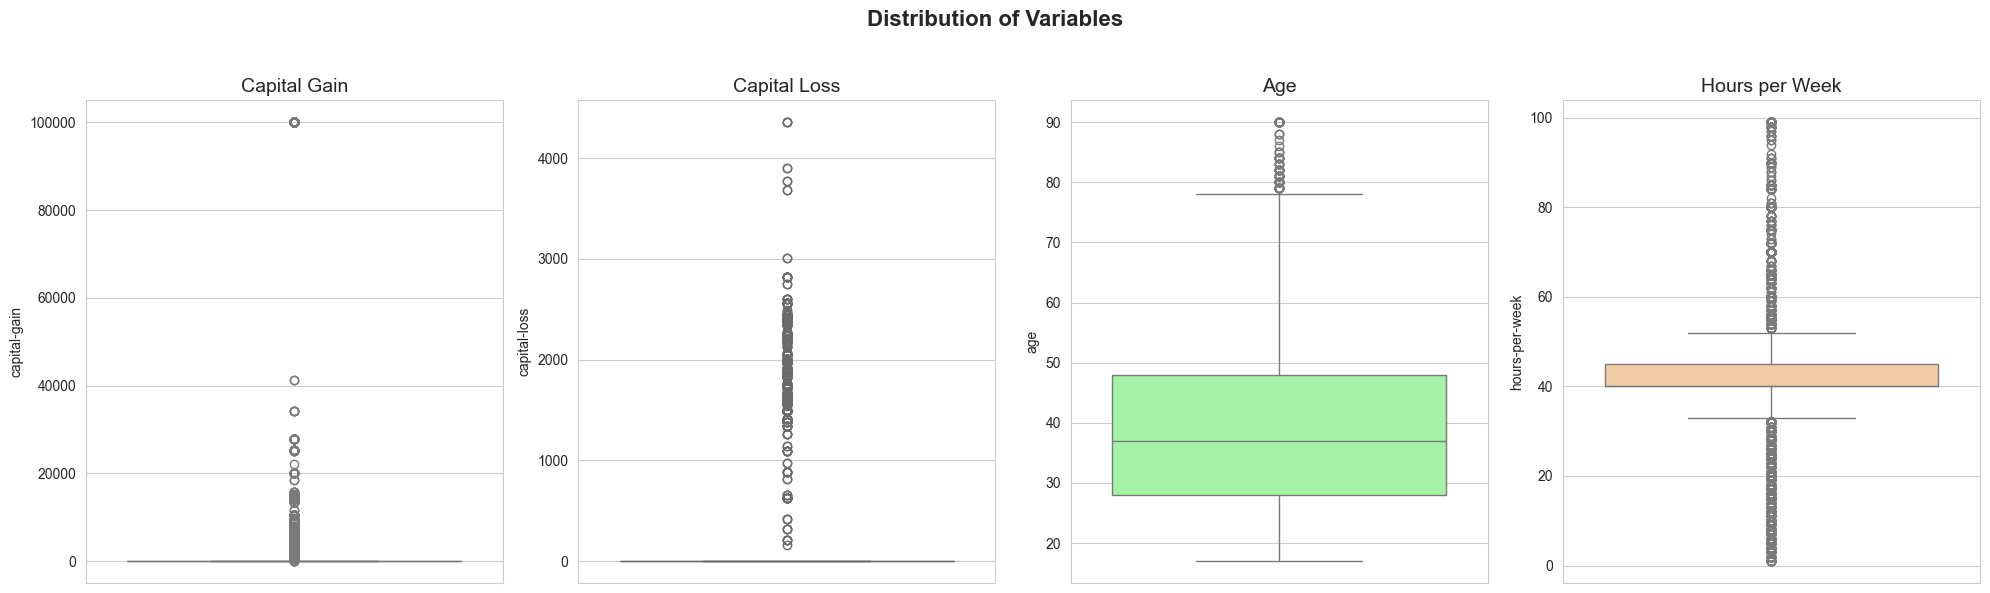

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Apply a Seaborn theme for a better visual appearance
sns.set_style("whitegrid")

# Create a figure with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=False)

# Define variables and titles for subplots
columns = ['capital-gain', 'capital-loss', 'age', 'hours-per-week']
titles = ['Capital Gain', 'Capital Loss', 'Age', 'Hours per Week']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Custom colors

# Create customized boxplots
for i, col in enumerate(columns):
    sns.boxplot(data=data[col], ax=axes[i], color=colors[i])
    axes[i].set_title(titles[i], fontsize=14)
    axes[i].set_xlabel('')  # Remove X-axis labels

# Add a main title
fig.suptitle('Distribution of Variables', fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



In [40]:
# Analyze the distribution of 'capital-loss' by printing summary statistics to identify potential anomalies
print(data['capital-loss'].describe())

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64


In [41]:
# Analyze the distribution of 'capital-gain' by printing summary statistics to identify potential anomalies
print(data['capital-gain'].describe())

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64


In [43]:
# Count the cases where capital-gain > 40,000
num_cases_gain = data[data['capital-gain'] > 40000].shape[0]

# Corrected variable name in print statement
print(f"The number of cases with capital-gain greater than 40,000 is: {num_cases_gain}")

The number of cases with capital-gain greater than 40,000 is: 161


In [44]:
# Check for rows with 'capital-loss' values exceeding the capped limit (3,000) to identify anomalies
print(data[data['capital-loss'] > 3000])

       age  fnlwgt     education  education-num  sex  capital-gain  \
5309    41   70037  Some-college             10    1             0   
8963    90   77053       HS-grad              9    0             0   
11902   34  216864       HS-grad              9    0             0   
12600   74   88638     Doctorate             16    0             0   
14756   82  132870       HS-grad              9    0             0   
15942   38  150601          10th              6    1             0   
20416   54  140359       7th-8th              4    0             0   
23054   68  422013       HS-grad              9    0             0   
23802   41  264663  Some-college             10    0             0   
30539   45  172274     Doctorate             16    0             0   
30781   66  186061  Some-college             10    0             0   

       capital-loss  hours-per-week  income  workclass_Local-gov  ...  \
5309           3004              60       1                False  ...   
8963         

In [45]:
# Count the cases where capital-loss > 3,000
num_cases_loss = data[data['capital-loss'] > 3000].shape[0]

print(f"The number of cases with capital-loss greater than 3,000 is: {num_cases_loss}")

The number of cases with capital-loss greater than 3,000 is: 11


In [46]:
# Analyze the distribution of 'hours-per-week' by printing summary statistics to identify potential anomalies
print(data['hours-per-week'].describe())

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


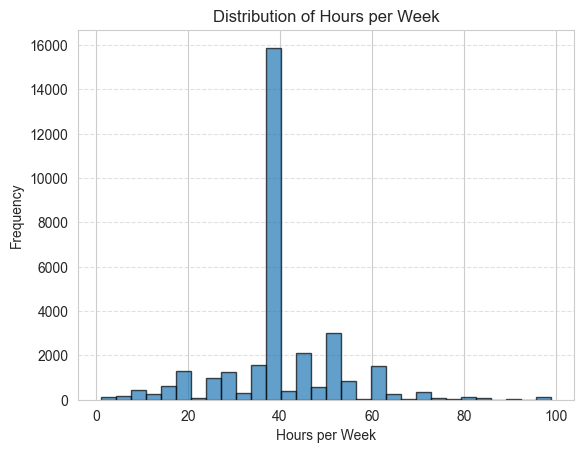

In [48]:
# Create a histogram for hours-per-week
plt.hist(data['hours-per-week'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [49]:
# Check for rows where individuals report working only 1 hour per week to investigate potential anomalies
print(data[data['hours-per-week'] == 1])

       age  fnlwgt     education  education-num  sex  capital-gain  \
189     58  109567     Doctorate             16    1             0   
1036    66  150726           9th              5    1          1409   
1262    69  195779     Assoc-voc             11    0             0   
5590    78  363134       HS-grad              9    0             0   
5632    45  189564       Masters             14    0             0   
5766    62   97231  Some-college             10    0             0   
5808    76  211574          10th              6    1             0   
8447    67  244122     Assoc-voc             11    0             0   
9147    75  260543          10th              6    0             0   
11451   27  147951       HS-grad              9    1             0   
19337   72   76860       HS-grad              9    1             0   
19750   23   72887       HS-grad              9    1             0   
20072   65   76043       HS-grad              9    1             0   
20909   77   71676  

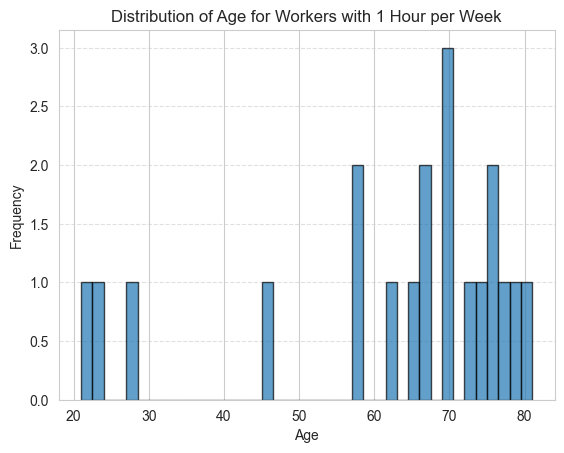

In [52]:
# Filter the cases where hours-per-week = 1
one_hour_workers = data[data['hours-per-week'] == 1]

# Create a histogram for the age variable
plt.hist(one_hour_workers['age'], bins=40, edgecolor='k', alpha=0.7)
plt.title('Distribution of Age for Workers with 1 Hour per Week')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [53]:
# Check for individuals reporting 90 or more working hours per week to investigate extreme cases
print(data[data['hours-per-week'] >= 90])

       age  fnlwgt     education  education-num  sex  capital-gain  \
272     50   30653       Masters             14    1          2407   
935     37  176900       HS-grad              9    1             0   
1172    25  404616       Masters             14    1             0   
1417    31  179186     Bachelors             13    1             0   
1730    24  180060       Masters             14    1          6849   
...    ...     ...           ...            ...  ...           ...   
31681   43  266324       HS-grad              9    1             0   
31699   43  163108  Some-college             10    1             0   
31849   21  304602     Assoc-voc             11    1             0   
32469   58  181974     Doctorate             16    0             0   
32531   30   33811     Bachelors             13    0             0   

       capital-loss  hours-per-week  income  workclass_Local-gov  ...  \
272               0              98       0                False  ...   
935          

In [54]:
# Check for persons who declared 0 hours worked but belong to Private workclass
inconsistent_rows = data[(data['hours-per-week'] == 0) & (data['workclass_Private'] == True)]
print(inconsistent_rows)

Empty DataFrame
Columns: [age, fnlwgt, education, education-num, sex, capital-gain, capital-loss, hours-per-week, income, workclass_Local-gov, workclass_Never-worked, workclass_Private, workclass_Self-emp-inc, workclass_Self-emp-not-inc, workclass_State-gov, workclass_Without-pay, marital-status_Married-AF-spouse, marital-status_Married-civ-spouse, marital-status_Married-spouse-absent, marital-status_Never-married, marital-status_Separated, marital-status_Widowed, occupation_Armed-Forces, occupation_Craft-repair, occupation_Exec-managerial, occupation_Farming-fishing, occupation_Handlers-cleaners, occupation_Machine-op-inspct, occupation_No-occupation, occupation_Other-service, occupation_Priv-house-serv, occupation_Prof-specialty, occupation_Protective-serv, occupation_Sales, occupation_Tech-support, occupation_Transport-moving, relationship_Not-in-family, relationship_Other-relative, relationship_Own-child, relationship_Unmarried, relationship_Wife, race_Asian-Pac-Islander, race_Blac

In [55]:
# Check if in bool type columns there are only true or false values
for col in data.select_dtypes(include='bool').columns:
    print(f"{col}: {data[col].unique()}")

workclass_Local-gov: [False  True]
workclass_Never-worked: [False  True]
workclass_Private: [False  True]
workclass_Self-emp-inc: [False  True]
workclass_Self-emp-not-inc: [False  True]
workclass_State-gov: [ True False]
workclass_Without-pay: [False  True]
marital-status_Married-AF-spouse: [False  True]
marital-status_Married-civ-spouse: [False  True]
marital-status_Married-spouse-absent: [False  True]
marital-status_Never-married: [ True False]
marital-status_Separated: [False  True]
marital-status_Widowed: [False  True]
occupation_Armed-Forces: [False  True]
occupation_Craft-repair: [False  True]
occupation_Exec-managerial: [False  True]
occupation_Farming-fishing: [False  True]
occupation_Handlers-cleaners: [False  True]
occupation_Machine-op-inspct: [False  True]
occupation_No-occupation: [False  True]
occupation_Other-service: [False  True]
occupation_Priv-house-serv: [False  True]
occupation_Prof-specialty: [False  True]
occupation_Protective-serv: [False  True]
occupation_Sales

In [59]:
# Print the correlation values for the 'income' column, sorted in descending order
print(correlation_matrix['income'].sort_values(ascending=False))

NameError: name 'correlation_matrix' is not defined

In [60]:
print(data['age'].describe())

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


In [61]:
# Winsonorisation applied to dataset to reduce the influence of outliers (extreme values) in capital-gain, capital-loss, hours-per-week, age.
data['capital-gain'] = data['capital-gain'].apply(lambda x: min(x, 40000))
data['capital-loss'] = data['capital-loss'].apply(lambda x: min(x, 3000))
data['hours-per-week'] = data['hours-per-week'].apply(lambda x: min(x, 80))
# data['age'] = data['age'].apply(lambda x: min(x, 78))

##### 04. Normalization / Standardization if necesarry


In [62]:
print(data.describe())

                age        fnlwgt  education-num           sex  capital-gain  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679      0.669205    784.584718   
std       13.640433  1.055500e+05       2.572720      0.470506   3750.078355   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      1.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      1.000000      0.000000   
max       90.000000  1.484705e+06      16.000000      1.000000  40000.000000   

       capital-loss  hours-per-week        income  
count  32561.000000    32561.000000  32561.000000  
mean      87.034121       40.357329      0.240810  
std      400.651233       12.034700      0.427581  
min        0.000000        1.000000      0.000000  
25%        0.000000

In [63]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the dataset for keeping the original data
data_normalized = data.copy()

# Normalize the numeric columns to a uniform range (0-1) to ensure consistent feature scaling
numeric_columns = ['fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
data_normalized[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [64]:
# Generate descriptive statistics for the original dataset 
print(data[numeric_columns].describe())


             fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
count  3.256100e+04   32561.000000  32561.000000  32561.000000    32561.000000
mean   1.897784e+05      10.080679    784.584718     87.034121       40.357329
std    1.055500e+05       2.572720   3750.078355    400.651233       12.034700
min    1.228500e+04       1.000000      0.000000      0.000000        1.000000
25%    1.178270e+05       9.000000      0.000000      0.000000       40.000000
50%    1.783560e+05      10.000000      0.000000      0.000000       40.000000
75%    2.370510e+05      12.000000      0.000000      0.000000       45.000000
max    1.484705e+06      16.000000  40000.000000   3000.000000       80.000000


In [65]:
# Descriptive statistics for the normalized dataset
print(data_normalized[numeric_columns].describe())

             fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
count  3.256100e+04   3.256100e+04  3.256100e+04  3.256100e+04    3.256100e+04
mean  -1.001625e-16   1.471887e-16  1.920327e-17  8.685114e-17   -1.003807e-17
std    1.000015e+00   1.000015e+00  1.000015e+00  1.000015e+00    1.000015e+00
min   -1.681631e+00  -3.529656e+00 -2.092214e-01 -2.172350e-01   -3.270371e+00
25%   -6.816910e-01  -4.200596e-01 -2.092214e-01 -2.172350e-01   -2.969204e-02
50%   -1.082193e-01  -3.136003e-02 -2.092214e-01 -2.172350e-01   -2.969204e-02
75%    4.478765e-01   7.460392e-01 -2.092214e-01 -2.172350e-01    3.857796e-01
max    1.226856e+01   2.300838e+00  1.045739e+01  7.270689e+00    3.294081e+00


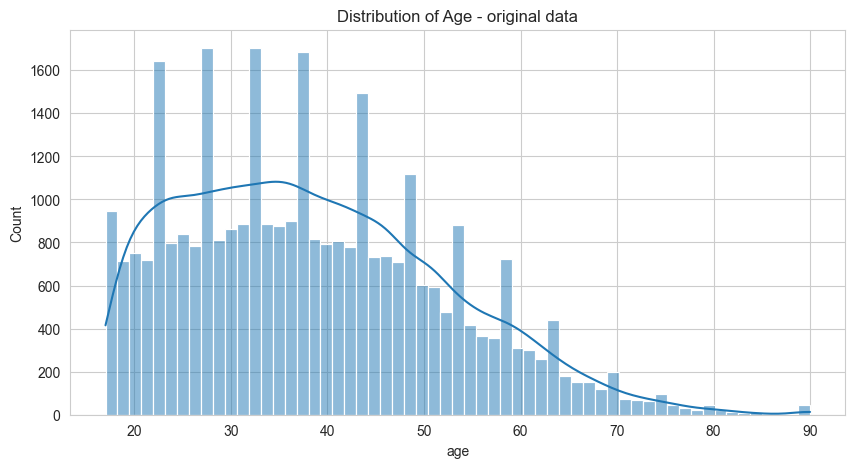

In [66]:
# Visualize the distribution of 'age' feature, before and after normalization to identify its range, skewness 
plt.figure(figsize=(10, 5))

# Original distribution
sns.histplot(data['age'], kde=True)
plt.title("Distribution of Age - original data")

plt.show()

In [67]:
data_normalized.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_No-occupation', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       

In [68]:
# Display the correlation matrix to identify linear relationships between features.

# Remove non-numeric 'education' column and keep 'education-num'
numeric_data = data_normalized.drop(columns=['education']).select_dtypes(include=['float64', 'int64'])

# Calculate and display the correlation matrix
correlation_matrix = numeric_data.corr()
print(correlation_matrix)


                     age    fnlwgt  education-num       sex  capital-gain  \
age             1.000000 -0.076646       0.036527  0.088832      0.108415   
fnlwgt         -0.076646  1.000000      -0.043195  0.026858     -0.001523   
education-num   0.036527 -0.043195       1.000000  0.012280      0.155353   
sex             0.088832  0.026858       0.012280  1.000000      0.063505   
capital-gain    0.108415 -0.001523       0.155353  0.063505      1.000000   
capital-loss    0.056859 -0.010215       0.080659  0.046661     -0.045450   
hours-per-week  0.068770 -0.017745       0.151548  0.232914      0.097838   
income          0.234037 -0.009463       0.335154  0.215980      0.301106   

                capital-loss  hours-per-week    income  
age                 0.056859        0.068770  0.234037  
fnlwgt             -0.010215       -0.017745 -0.009463  
education-num       0.080659        0.151548  0.335154  
sex                 0.046661        0.232914  0.215980  
capital-gain       -0

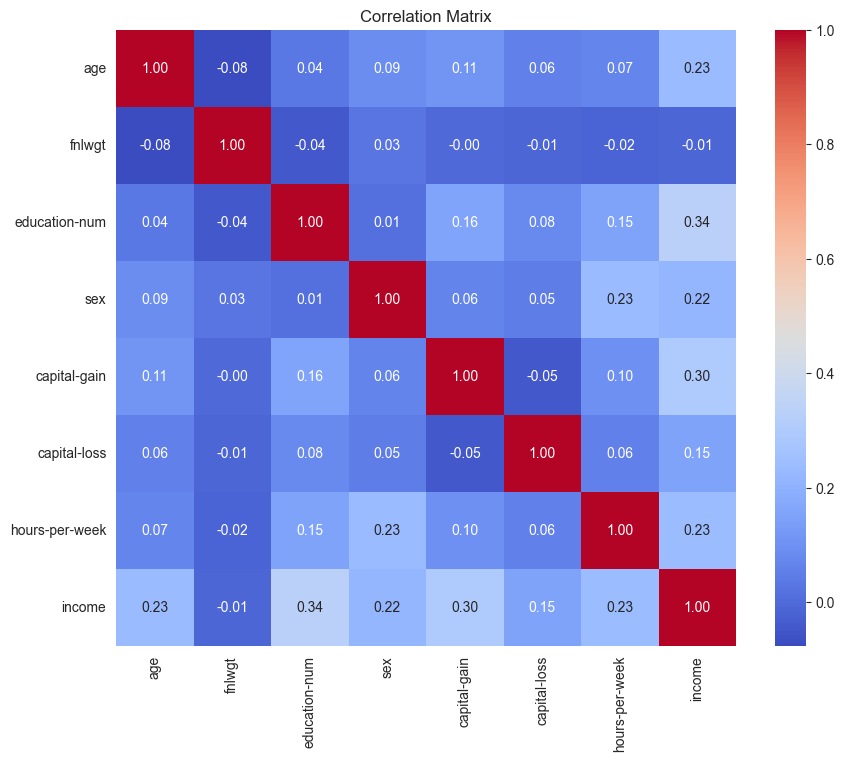

In [69]:
# Visualise correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


##### 05. Feature engineering

In [70]:
data_normalized.sample(n=20)

age    fnlwgt     education  education-num  sex  capital-gain  \
4810    40 -0.095325     Bachelors       1.134739    1     -0.209221   
7208    30 -0.360075  Some-college      -0.031360    1     -0.209221   
4612    38 -0.508747   Prof-school       1.912138    1     -0.209221   
12826   19  0.189938  Some-college      -0.031360    0     -0.209221   
25905   28 -1.308465       HS-grad      -0.420060    1     -0.209221   
25964   49 -0.391322     Assoc-voc       0.357340    0     -0.209221   
27874   55 -0.663462       Masters       1.523438    0     -0.209221   
4388    29 -1.445436       HS-grad      -0.420060    1     -0.209221   
2105    17 -0.814493          12th      -0.808759    1     -0.209221   
5688    41 -1.055141       HS-grad      -0.420060    0     -0.209221   
31493   28  0.139629          10th      -1.586158    1     -0.209221   
9478    47  2.607020       HS-grad      -0.420060    1     -0.209221   
12503   31 -0.082307       HS-grad      -0.420060    1     -0.209221   
11275   29  0.105635       HS-grad      -0.420060    1     -0.209221   
18862   37 -0.777287       HS-grad      -0.420060    1     -0.209221   
30655   23  2.340346  Some-college      -0.031360    1     -0.209221   
7436    21  0.534624  Some-college      -0.031360    0     -0.209221   
13060   63  0.112296           9th      -1.974858    1     -0.209221   
15466   30 -0.150835  Some-college      -0.031360    1     -0.209221   
19588   27  0.536831          11th      -1.197459    0     -0.209221   

       capital-loss  hours-per-week  income  workclass_Local-gov  ...  \
4810       3.686470        1.632195       1                False  ...   
7208      -0.217235       -0.029692       1                False  ...   
4612      -0.217235        1.632195       1                False  ...   
12826     -0.217235       -2.107050       0                False  ...   
25905     -0.217235       -0.445164       0                False  ...   
25964     -0.217235       -0.029692       0                False  ...   
27874     -0.217235       -0.029692       0                False  ...   
4388      -0.217235        1.216723       0                False  ...   
2105      -0.217235       -0.029692       0                False  ...   
5688      -0.217235       -0.029692       1                False  ...   
31493     -0.217235        0.385780       0                False  ...   
9478      -0.217235        0.385780       0                False  ...   
12503     -0.217235        0.801251       1                False  ...   
11275     -0.217235       -0.029692       1                False  ...   
18862     -0.217235        0.385780       0                False  ...   
30655     -0.217235       -0.029692       0                False  ...   
7436      -0.217235       -1.691579       0                False  ...   
13060     -0.217235       -0.029692       0                False  ...   
15466      4.530109       -0.029692       1                False  ...   
19588     -0.217235       -0.029692       0                False  ...   

       native-country_Portugal  native-country_Puerto-Rico  \
4810                     False                       False   
7208                     False                       False   
4612                     False                       False   
12826                    False                       False   
25905                    False                       False   
25964                    False                       False   
27874                    False                       False   
4388                     False                       False   
2105                     False                       False   
5688                     False                       False   
31493                    False                       False   
9478                     False                       False   
12503                    False                       False   
11275                    False                       False   
18862                    False

In [71]:
# Bins creation
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
data_normalized['age_bin'] = pd.cut(data_normalized['age'], bins=bins, labels=labels)

# Display the first rows for cheching the binning creation
print(data_normalized[['age', 'age_bin']].head(10))

   age age_bin
0   39   35-44
1   50   45-54
2   38   35-44
3   53   45-54
4   28   25-34
5   37   35-44
6   49   45-54
7   52   45-54
8   31   25-34
9   42   35-44


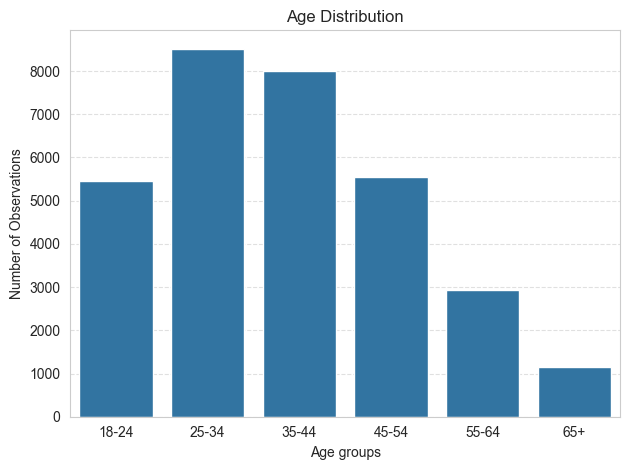

In [72]:
# Create a countplot for the 'age_bin' variable
sns.countplot(x='age_bin', data=data_normalized)

# Add a title and labels in English
plt.title('Age Distribution')
plt.xlabel('Age groups')
plt.ylabel('Number of Observations')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [73]:
data_normalized.head(5)

age    fnlwgt  education  education-num  sex  capital-gain  capital-loss  \
0   39 -1.063611  Bachelors       1.134739    1      0.370509     -0.217235   
1   50 -1.008707  Bachelors       1.134739    1     -0.209221     -0.217235   
2   38  0.245079    HS-grad      -0.420060    1     -0.209221     -0.217235   
3   53  0.425801       11th      -1.197459    1     -0.209221     -0.217235   
4   28  1.408176  Bachelors       1.134739    0     -0.209221     -0.217235   

   hours-per-week  income  workclass_Local-gov  ...  \
0       -0.029692       0                False  ...   
1       -2.273239       0                False  ...   
2       -0.029692       0                False  ...   
3       -0.029692       0                False  ...   
4       -0.029692       0                False  ...   

   native-country_Puerto-Rico  native-country_Scotland  native-country_South  \
0                       False                    False                 False   
1                       False                    False                 False   
2                       False                    False                 False   
3                       False                    False                 False   
4                       False                    False                 False   

   native-country_Taiwan  native-country_Thailand  \
0                  False                    False   
1                  False                    False   
2                  False                    False   
3                  False                    False   
4                  False                    False   

   native-country_Trinadad&Tobago  native-country_United-States  \
0                           False                          True   
1                           False                          True   
2                           False                          True   
3                           False                          True   
4                           False                         False   

   native-country_Vietnam  native-country_Yugoslavia  age_bin  
0                   False                      False    35-44  
1                   False                      False    45-54  
2                   False                      False    35-44  
3                   False                      False    45-54  
4                   False                      False    25-34  

[5 rows x 86 columns]

In [77]:
# Save the DataFrame to a CSV file.
data_normalized.to_csv("data_normalized.csv", index = False, encoding= "utf-8")
